In [10]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import collections  as mc
%load_ext autoreload
%autoreload 2
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_style("white")
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
data = pd.read_csv('https://raw.githubusercontent.com/abdul232/DMML_Team_Rolex/master/data/England%202008%202018%20Premiere%20League%20Clean%20DATA.csv', sep=';')
# view the first 10 rows 
data.head(10)

,Match_ID,Date,HomeTeam,AwayTeam,Home Team Goals,Away Team Goals,Match Result,Referee,Home Team Shots,Away Team Shots,...,Betbrain Average Home,Betbrain Maximum Draw,Betbrain Average Draw,Betbrain Maximum Away,Betbrain Average Away,Betbrain Numbers of bookmakers Goals,Betbrain Max > 2.5 Goals,Betbrain Average > 2.5 Goals,Betbrain Max < 2.5 Goals,Betbrain Average < 2.5 Goals
0,1.0,16.08.2008,Arsenal,West Brom,1.0,0.0,H,H Webb,24.0,5.0,...,1.22,6.25,5.60,17.00,13.52,37.0,1.71,1.65,2.25,2.14
1,2.0,16.08.2008,Bolton,Stoke,3.0,1.0,H,C Foy,14.0,8.0,...,1.81,3.51,3.35,5.30,4.54,37.0,2.33,2.16,1.70,1.64
2,3.0,16.08.2008,Everton,Blackburn,2.0,3.0,A,A Marriner,10.0,15.0,...,1.98,3.39,3.25,4.21,3.86,37.0,2.34,2.17,1.70,1.63
3,4.0,16.08.2008,Hull,Fulham,2.0,1.0,H,P Walton,11.0,12.0,...,2.56,3.38,3.23,2.89,2.68,37.0,2.32,2.15,1.69,1.64
4,5.0,16.08.2008,Middlesbrough,Tottenham,2.0,1.0,H,M Atkinson,14.0,8.0,...,3.19,3.55,3.31,2.30,2.20,37.0,1.90,1.81,2.12,1.92
5,6.0,16.08.2008,Sunderland,Liverpool,0.0,1.0,A,A Wiley,6.0,14.0,...,5.24,3.75,3.50,1.76,1.68,37.0,2.22,2.08,1.76,1.69
6,7.0,16.08.2008,West Ham,Wigan,2.0,1.0,H,S Bennett,15.0,22.0,...,1.94,3.40,3.27,4.40,3.98,37.0,2.22,2.10,1.75,1.68
7,8.0,17.08.2008,Aston Villa,Man City,4.0,2.0,H,P Dowd,14.0,13.0,...,1.84,3.55,3.32,5.05,4.36,34.0,2.33,2.12,1.73,1.66
8,9.0,17.08.2008,Chelsea,Portsmouth,4.0,0.0,H,M Dean,18.0,12.0,...,1.32,5.20,4.69,12.00,10.05,36.0,2.01,1.90,1.93,1.83
9,10.0,17.08.2008,Man United,Newcastle,1.0,1.0,D,M Riley,18.0,11.0,...,1.28,5.50,5.03,13.00,11.00,36.0,1.83,1.72,2.20,2.03


In [12]:
data.shape


(4182, 47)

In [13]:
#We have to drop the two lasts rows because they are NaN
data = data.drop([4180, 4181])

#We have a new dimension
data.shape

(4180, 47)

In [14]:
data.dtypes

Match_ID                                float64
Date                                     object
HomeTeam                                 object
AwayTeam                                 object
Home Team Goals                         float64
Away Team Goals                         float64
Match Result                             object
Referee                                  object
Home Team Shots                         float64
Away Team Shots                         float64
Home Team Shots on Target               float64
Away Team Shots on Target               float64
Home Fouls Committed                    float64
Away Fouls Committed                    float64
Home Corners                            float64
Away Cornners                           float64
Home Yellow Cards                       float64
Away Yellow Cards                       float64
Home Red Cards                          float64
Away Red Cards                          float64
B365 Home                               

In [6]:
data['Match_ID'] = data.Match_ID.astype(int)

In [15]:
data[['Match_ID', 'Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Cornners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']]= data[['Match_ID', 'Home Team Goals', 'Away Team Goals', 'Home Team Shots','Away Team Shots', 'Home Team Shots on Target', 'Away Team Shots on Target', 'Home Fouls Committed', 'Away Fouls Committed', 'Home Corners', 'Away Cornners', 'Home Yellow Cards', 'Away Yellow Cards', 'Home Red Cards', 'Away Red Cards']].astype(int)
data.dtypes

Match_ID                                  int64
Date                                     object
HomeTeam                                 object
AwayTeam                                 object
Home Team Goals                           int64
Away Team Goals                           int64
Match Result                             object
Referee                                  object
Home Team Shots                           int64
Away Team Shots                           int64
Home Team Shots on Target                 int64
Away Team Shots on Target                 int64
Home Fouls Committed                      int64
Away Fouls Committed                      int64
Home Corners                              int64
Away Cornners                             int64
Home Yellow Cards                         int64
Away Yellow Cards                         int64
Home Red Cards                            int64
Away Red Cards                            int64
B365 Home                               

In [16]:
#We would like to do 3 different regression, one for the Home team wins, one for the draws and ondre for the Away team wins
data = pd.get_dummies(data, columns=['Match Result'])

In [17]:
#We have to change the type of some variable
data['Date'] = pd.to_datetime(data['Date'], format="%d.%m.%Y")

In [18]:
from sklearn import preprocessing
# separate the data from the target attributes
#X = data['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Iterwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
# normalisation par formule (x - x.min()) / (x.max() - x.min())
cols_to_norm = ['B365 Home','B365 Draw','B365 Away','Bet&Win Home','Bet&Win Draw','Bet&Win Away','Interwetten Home','Iterwetten Draw','Interwetten Away','William Hill Home','William Hill Draw','William Hill Away','VC Bet Home','VC Bet Draw','VC Bet Away']
data[cols_to_norm] = data[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())) 
data[cols_to_norm].head()

,B365 Home,B365 Draw,B365 Away,Bet&Win Home,Bet&Win Draw,Bet&Win Away,Interwetten Home,Iterwetten Draw,Interwetten Away,William Hill Home,William Hill Draw,William Hill Away,VC Bet Home,VC Bet Draw,VC Bet Away
0,0.006381,0.250000,0.348044,0.008521,0.234234,0.254373,0.007916,0.248619,0.354376,0.006015,0.264706,0.242424,0.009112,0.280,0.237866
1,0.035096,0.035714,0.084754,0.035088,0.036036,0.093777,0.036939,0.038674,0.110473,0.037594,0.029412,0.064171,0.036446,0.072,0.073406
2,0.042844,0.021429,0.072217,0.040100,0.031532,0.082306,0.050132,0.027624,0.078192,0.045113,0.029412,0.053030,0.045558,0.064,0.057361
3,0.070191,0.014286,0.042126,0.070175,0.022523,0.043590,0.071240,0.027624,0.053085,0.072682,0.009804,0.033422,0.070615,0.072,0.033293
4,0.097539,0.028571,0.028335,0.087719,0.027027,0.033553,0.097625,0.027624,0.038737,0.092732,0.039216,0.022950,0.097950,0.072,0.023265


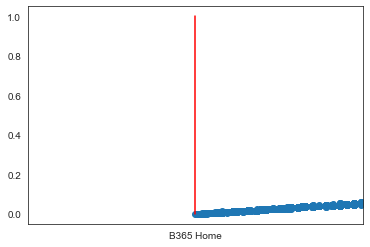

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#pour faire la régression on peut prendre qu'une seule variable à la fois
#feature_home_wins = ['B365 Home','Bet&Win Home','Interwetten Home','William Hill Home']
feature_home_wins = ['B365 Home']
X = data[feature_home_wins]
y = data['VC Bet Home']
#We create the linear model.

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

predicted = model.predict(X)
#print(predicted)

plt.scatter(X, y)
plt.plot([min(X), max(X)], [min(predicted), max(predicted)], color='red') # predicted
plt.show()


#mae = mean_absolute_error(predicted, y)
 
#print("MAE = %.2f" % mae)